In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/archive (5)/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [ ]:
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Initialize classifiers
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
dtree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()

In [ ]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name, results):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = [accuracy, precision, recall, f1]
    print(f"\n{model_name} Classifier:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
results = {}

In [ ]:
# Train and evaluate each classifier
train_and_evaluate(log_reg, X_train, X_test, y_train, y_test, "Logistic Regression", results)
train_and_evaluate(rf, X_train, X_test, y_train, y_test, "Random Forest", results)
train_and_evaluate(gb, X_train, X_test, y_train, y_test, "Gradient Boosting", results)
train_and_evaluate(dtree, X_train, X_test, y_train, y_test, "Decision Tree", results)
train_and_evaluate(knn, X_train, X_test, y_train, y_test, "K-Nearest Neighbors", results)
train_and_evaluate(nb, X_train, X_test, y_train, y_test, "Naive Bayes", results)


Logistic Regression Classifier:
Accuracy: 0.815
Precision: 0.5966386554621849
Recall: 0.1806615776081425
F1 Score: 0.27734375
Confusion Matrix:
 [[1559   48]
 [ 322   71]]

Random Forest Classifier:
Accuracy: 0.8685
Precision: 0.7754237288135594
Recall: 0.46564885496183206
F1 Score: 0.5818759936406994
Confusion Matrix:
 [[1554   53]
 [ 210  183]]

Gradient Boosting Classifier:
Accuracy: 0.8655
Precision: 0.7540983606557377
Recall: 0.4681933842239186
F1 Score: 0.5777080062794349
Confusion Matrix:
 [[1547   60]
 [ 209  184]]

Decision Tree Classifier:
Accuracy: 0.776
Precision: 0.4403470715835141
Recall: 0.5165394402035624
F1 Score: 0.4754098360655738
Confusion Matrix:
 [[1349  258]
 [ 190  203]]

K-Nearest Neighbors Classifier:
Accuracy: 0.8355
Precision: 0.6333333333333333
Recall: 0.38676844783715014
F1 Score: 0.48025276461295424
Confusion Matrix:
 [[1519   88]
 [ 241  152]]

Naive Bayes Classifier:
Accuracy: 0.8285
Precision: 0.6811594202898551
Recall: 0.23918575063613232
F1 Score: 0

In [ ]:
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])


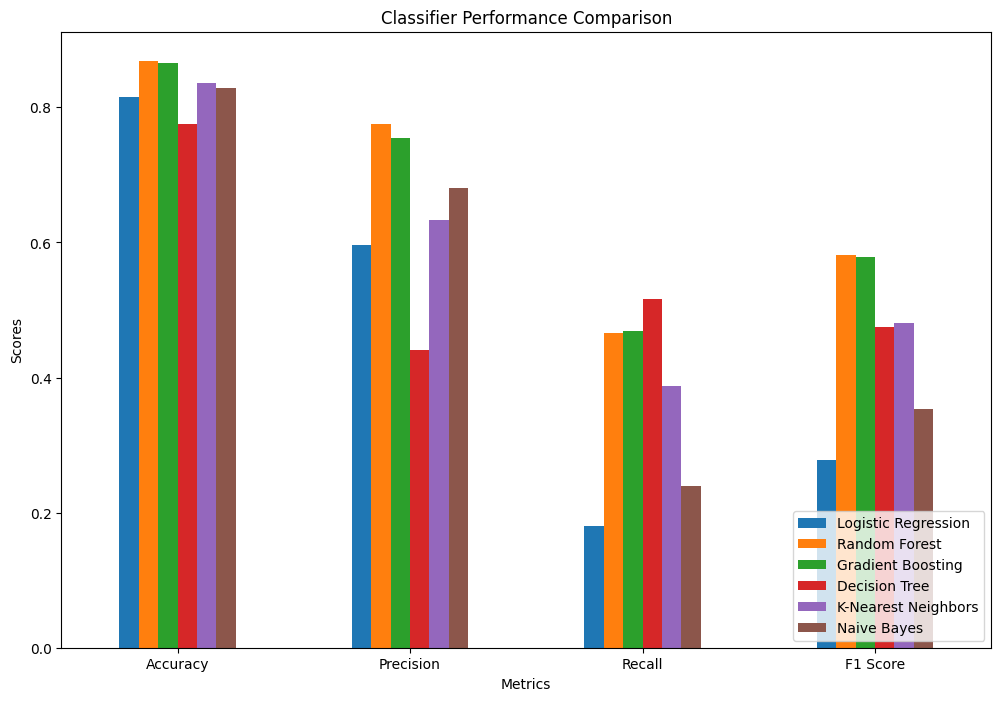

In [ ]:
# Plot the results
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Classifier Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Among the classifiers evaluated, the Random Forest model achieved the highest accuracy, with a performance score of 86.85%.